# 🔍 LLM Evaluation Metrics Demo: BLEU, ROUGE, BERTScore

This notebook demonstrates how to evaluate text generated by a Language Model using BLEU, ROUGE, and BERTScore.

We’ll compare:
- BLEU: measures n-gram precision
- ROUGE: measures recall-based overlap
- BERTScore: uses contextual embeddings for semantic similarity

In [2]:
!pip install nltk rouge-score bert-score --quiet
import nltk
nltk.download('punkt_tab')

from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
reference = ["The quick brown fox jumps over the lazy dog."]
candidate = "The brown fox quickly jumps over a lazy dog"

In [6]:
# BLEU Score
reference_tokens = [nltk.word_tokenize(reference[0])]
candidate_tokens = nltk.word_tokenize(candidate)
bleu = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=SmoothingFunction().method1)

In [7]:
# ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge = scorer.score(reference[0], candidate)

print(f"BLEU Score: {bleu:.4f}")
print("ROUGE Scores:", rouge)

BLEU Score: 0.0817
ROUGE Scores: {'rouge1': Score(precision=0.7777777777777778, recall=0.7777777777777778, fmeasure=0.7777777777777778), 'rougeL': Score(precision=0.7777777777777778, recall=0.7777777777777778, fmeasure=0.7777777777777778)}


In [8]:
import bert_score

refs = [reference[0]]
cands = [candidate]
P, R, F1 = bert_score.score(cands, refs, lang="en", verbose=False)
print(f"BERTScore - Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore - Precision: 0.9693, Recall: 0.9669, F1: 0.9681


In [3]:
reference = ["The AI system responded with accurate and fluent answers."]
candidate = "The AI system responded accurately and fluently."

reference_tokens = [nltk.word_tokenize(reference[0])]
candidate_tokens = nltk.word_tokenize(candidate)
bleu = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=SmoothingFunction().method1)

# ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge = scorer.score(reference[0], candidate)

print(f"BLEU Score: {bleu:.4f}")
print("ROUGE Scores:", rouge)

BLEU Score: 0.2980
ROUGE Scores: {'rouge1': Score(precision=0.8571428571428571, recall=0.6666666666666666, fmeasure=0.75), 'rougeL': Score(precision=0.8571428571428571, recall=0.6666666666666666, fmeasure=0.75)}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


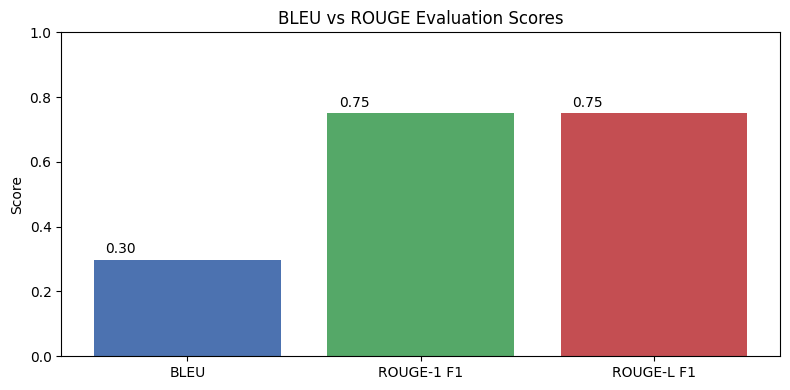

In [4]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt


# Define sentences
reference = ["The AI system responded with accurate and fluent answers."]
candidate = "The AI system responded accurately and fluently."

# Tokenize
ref_tokens = [word_tokenize(reference[0])]
cand_tokens = word_tokenize(candidate)

# BLEU Score
smooth = SmoothingFunction().method1
bleu_score = sentence_bleu(ref_tokens, cand_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth)

# ROUGE Scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_scores = scorer.score(reference[0], candidate)

# Plotting
metrics = ['BLEU', 'ROUGE-1 F1', 'ROUGE-L F1']
values = [bleu_score, rouge_scores['rouge1'].fmeasure, rouge_scores['rougeL'].fmeasure]

plt.figure(figsize=(8, 4))
bars = plt.bar(metrics, values, color=['#4c72b0', '#55a868', '#c44e52'])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("BLEU vs ROUGE Evaluation Scores")
for bar in bars:
    plt.text(bar.get_x() + 0.05, bar.get_height() + 0.02, f"{bar.get_height():.2f}")
plt.tight_layout()
plt.show()

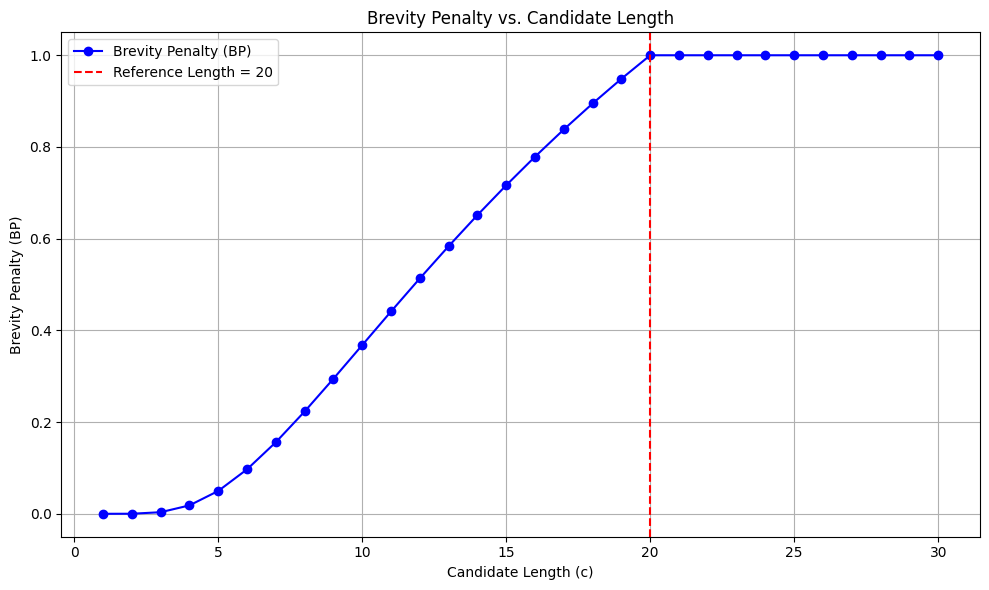

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Reference sentence length (fixed)
r = 20

# Candidate sentence lengths ranging from 1 to 30
candidate_lengths = np.arange(1, 31)
bp_values = []

# Calculate Brevity Penalty for each candidate length
for c in candidate_lengths:
    if c > r:
        bp = 1  # No penalty if candidate is longer
    else:
        bp = np.exp(1 - r / c)  # Apply exponential penalty
    bp_values.append(bp)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(candidate_lengths, bp_values, marker='o', color='blue', label='Brevity Penalty (BP)')
plt.axvline(x=r, color='red', linestyle='--', label='Reference Length = 20')
plt.title("Brevity Penalty vs. Candidate Length")
plt.xlabel("Candidate Length (c)")
plt.ylabel("Brevity Penalty (BP)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The graph above shows how **Brevity Penalty (BP)** behaves as the **candidate sentence length (c) changes:**

When ``c ≥ r`` (right of the red line), **BP = 1** → no penalty.

When ``c < r``, BP drops **exponentially** → penalizing overly short outputs.

This ensures that **BLEU doesn’t reward incomplete answers**, even if the precision is high.

In [10]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize

reference = ["the quick brown fox jumps over the lazy dog"]
candidate = "the quick brown fox jumps over the dog"

ref = [word_tokenize(reference[0])]
cand = word_tokenize(candidate)

bleu = sentence_bleu(ref, cand, weights=(0.25, 0.25, 0.25, 0.25),
                     smoothing_function=SmoothingFunction().method1)

print(f"BLEU Score: {bleu:.4f}")

BLEU Score: 0.7673


## Inference

* A higher BLEU score indicates that a **machine-translated text is more similar to a human-translated reference.**

* Specifically, a score closer to 1 suggests a high level of similarity between the machine translation and the reference, while a score near 0 suggests significant differences.